In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
from IPython.display import HTML, Latex, Math

In [2]:
params = {'font.size':12, 'legend.fontsize':'medium', 'axes.labelsize':'large', 'axes.titlesize':'large'}
plt.rcParams.update(params)

In [7]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 6</span>

Scopo dell'esercitazione è di simulare in un ensemble canonico un _modello di Ising monodimensionale in periodic boundary conditions con numero di spin fissato_ utilizzando per il campionamento del peso di Boltzmann $p(\{ s_i \}) = e^{\frac{-\beta H}{Z}}$ sia un algoritmo di Metropolis sia un algoritmo di Gibbs; i risultati ottenuti vengono utilizzati per valutare alcune proprietà termodinamiche del modello, quali

- Energia interna $U(N,T) = \langle H \rangle_{h=0}$ 

- Capacità termica $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 

- Suscettività $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$

- Magnetizzazione $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

dove $H$ è l'hamiltoniana del sistema, $h$ è il campo magnetico esterno applicato, $T = [2, 0.5]$ la temperatura del sistema da variare, con $\beta=\frac{1}{k_b T} = \frac{1}{T}$, $N = 50$ è il numero di spin nel reticolo e dove è stata posta l'interazione tra gli spin primi vicini $J = 1$, indicando un modello per un materiale **ferromagnetico**. Si lavora inoltre con _periodic boundary conditions_, per cui $s_{N+1} = s_{1}$.

Il **modello di Ising** è un modello della meccanica statistica utilizzato per descrivere il magnetismo nella materia: questo viene generato dall'interazione dei momenti di dipolo magnetici associati agli spin di ogni atomo del materiale. Utilizzando come geometria del materiale un reticolo, si può modellizzare il problema associando uno spin ad ogni sito del reticolo. Lo spin può avere valore $s = \pm 1$ in base alla sua orientazione, come spin up oppure come spin down. In base all'orientazione di ogni singolo spin, il modello può avere $2^N$ configurazioni diverse ognuna con un'energia che può esser descritta da un'hamiltoniana

$$H = -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$

assumendo  $\mu_B=1$ e $k_B=1$. Per un materiale ferromagnetico è possibile avere, anche in assenza di campo magnetico esterno, una magnetizzazione spontanea sotto una certa temperatura che porta gli spin del modello ad essere tutti allineati parallelamente; in questa situazione si avrà una magnetizzazione generale $M(N,T,h) = 0$, mentre sarà possibile calcolare le altre quantità anche per valori del campo esterno $h = 0$. Il peso statistico di Boltzmann associato ad ogni possibile configurazione $\mu$ è dato da 

$$p(\mu) = e^{\frac{-\beta H_{\mu}}{Z}}, \quad Z=\sum_{\{ s_i \}} e^{-\beta H}  = \lambda_1^N + \lambda_2^N $$ 

dove $Z$ indica la funzione di partizione e ha autovalori $\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$.

Il modello di Ising monodimensionale è risolvibile in modo esatto, e grazie alla funzione di partizione $Z$ si possono calcolare le proprietà termodinamiche del sistema in modo analitico:

- L'**energia interna** per spin: 

$\frac{U(N,T)}{N} \underset{h=0}= $ <span style="color:red"> $\frac{\langle H \rangle}{N}$ </span> = $ \\ $

= $-J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl) $

- La **capacità termica** per spin:

$ \frac{C(N,T)}{N} \underset{h=0}=  \frac{1}{N}\frac{\partial U(N,T)}{\partial T} = $ <span style="color:red"> $\frac{1}{N} k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right) $ </span> = $ \\ $

= $ k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\} $

- La **magnetizzazione** (con $h \neq 0$): 

$\frac{M(N,T,h)}{N}= k_B T \frac{\partial \ln Z}{\partial h} $= <span style="color:red"> $\left\langle \sum_{i=1,N}s_i \right\rangle$ </span> = $\\ $

= $\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]$

- La **suscettività magnetica** del materiale: 

$\chi(N,T)= \frac{\partial M}{\partial h}$ = <span style="color:red"> $\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right]$ </span> $ \\ $ $\underset{h=0}= \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$

### Campionamento con algoritmo di Metropolis e algoritmo di Gibbs

Dopo aver _equilibrato_ il sistema, di modo da avere una probabilità media di trovarlo in una particolare configurazione $\mu$ proporzionale al peso di Boltzmann $p(\mu)$, si sono campionate le diverse configurazioni del sistema utilizzando:
- _**Algoritmo di Metropolis**_: si effettuano mosse che muovano uno spin alla volta. Confrontando l'accettazione nel passaggio da uno stato $\mu$ ad un nuovo stato $\nu$, $A(\nu|\mu) = min[1, e^{-\beta (E_{\nu} - E_{\mu})}]$, con un numero random $r \in [0,1]$ si decide se muovere o meno lo spin analizzato. Le energie sono calcolate come $E = -J s_{n} [s_{n-1} + s_{n+1}] - h s_{n}$, dove $s_{n} = \pm 1$ e $n$ indica lo spin visitato in quella configurazione. Le mosse vengono effettuate per tutti gli $N$ spin del sistema.


- _**Algoritmo di Gibbs**_: per ogni spin, vengono valutate le energie $E_{up}$ e $E_{down}$ relative all'avere per lo spin $n$ visitato un'orientazione $s_{n} = +1$ o $s_{n} = -1$. Campionando la distribuzione di probabilità congiunta $$p(s_{n} = \pm 1 | \{s_{j} : j \neq n\}) = \frac{e^{-\beta E_{up}}}{e^{- \beta E_{up}} + e^{-\beta E_{down}}}$$ viene scelta l'orientazione che dovrà assumere lo spin visitato, per il quale verrà sempre accettata la mossa proposta. Per l'algoritmo di Gibbs si ha, difatti, un'accettazione $A(\nu|\mu) = 1$.

Variando l'intervallo di temperatura da un massimo di $T = 2 K$ ad un minimo di $T = 0.5 K$ e ponendo $J = 1$ si ottengono i seguenti risultati simulando il sistema per $2 \cdot 10^5$ steps MonteCarlo:

#### Energia interna

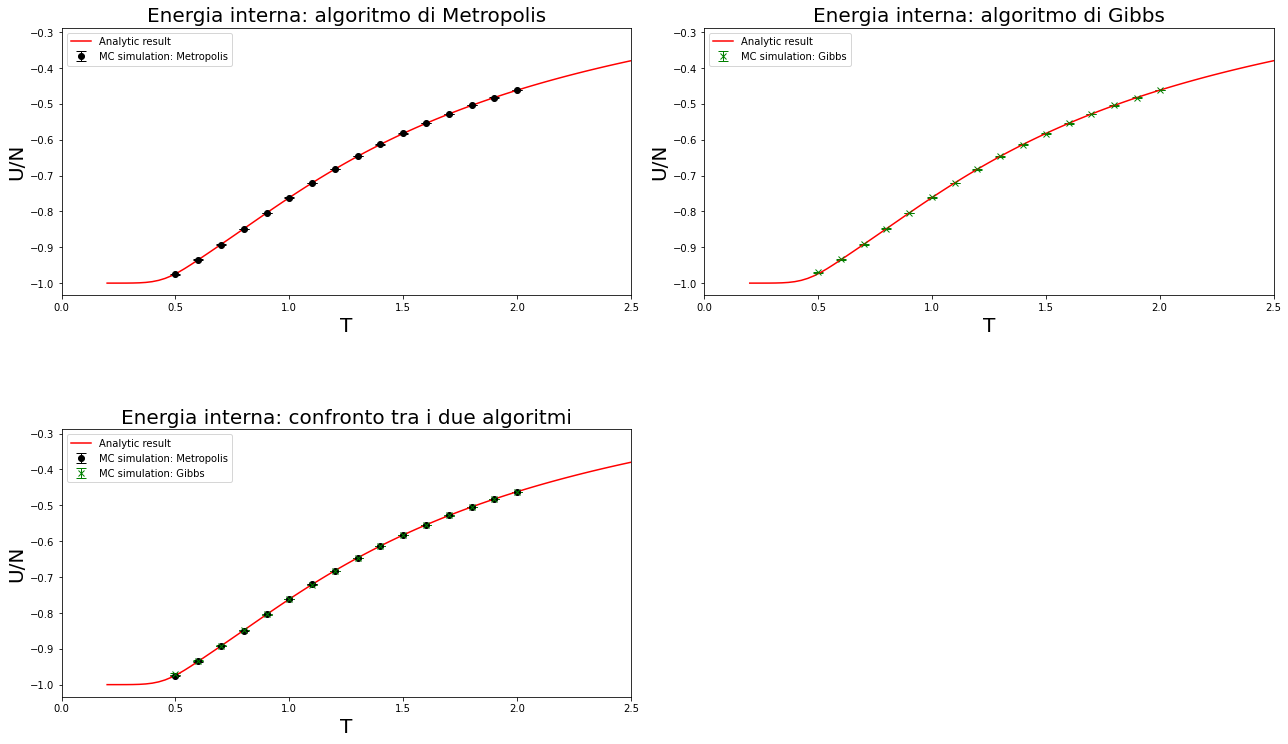

In [9]:
#Confronto dell'energia interna valutata con metodi MonteCarlo rispetto al risultato analitico
plt.figure(figsize =(18,10))
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.subplot(2,2,1)
T_sim, ene_sim_metro,std_metro = np.loadtxt("Output/metro_ene.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, ene_sim_metro, yerr=std_metro, label = "MC simulation: Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
plt.plot(T, e, label = "Analytic result", color = "red")
plt.title('Energia interna: algoritmo di Metropolis',fontsize = 20)
plt.xlim(0,2.5)
plt.xlabel('T',fontsize = 20)
plt.ylabel('U/N',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,2)
T_sim, ene_sim_gibbs,std_gibbs = np.loadtxt("Output/gibbs_ene.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, ene_sim_gibbs, yerr=std_gibbs, label = "MC simulation: Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.plot(T, e, label = "Analytic result", color = "red")
plt.title('Energia interna: algoritmo di Gibbs',fontsize = 20)
plt.xlim(0,2.5)
plt.xlabel('T',fontsize = 20)
plt.ylabel('U/N',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,3)
T_sim, ene_sim_metro,std_metro = np.loadtxt("Output/metro_ene.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, ene_sim_metro, yerr=std_metro, label = "MC simulation: Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
T_sim, ene_sim_gibbs,std_gibbs = np.loadtxt("Output/gibbs_ene.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, ene_sim_gibbs, yerr=std_gibbs, label = "MC simulation: Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.plot(T, e, label = "Analytic result", color = "red")
plt.title('Energia interna: confronto tra i due algoritmi',fontsize = 20)
plt.xlim(0,2.5)
plt.xlabel('T',fontsize = 20)
plt.ylabel('U/N',fontsize = 20)
plt.legend(loc = "best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

All'aumentare della temperatura aumenta l'energia interna per particella, mentre al diminuire della temperatura il valore dell'energia $\frac{U}{N}$ tende al valore $-1$. Il sistema, che parte da una configurazione iniziale di spin up-spin down casuale, ha infatti una tendenza a far allineare tutti gli spin con il diminuire della temperatura, così come accade per un modello ferromagnetico. Tuttavia un allineamento totale degli spin si avrà soltanto nel ground state del sistema, che può essere raggiunto a $T = 0 K$. Poiché la simulazione è stata effettuata con un campo magnetico esterno nullo, nonostante l'allineamento degli spin la magnetizzazione totale del sistema $M(N, T, h) = 0$. 

#### Capacità termica

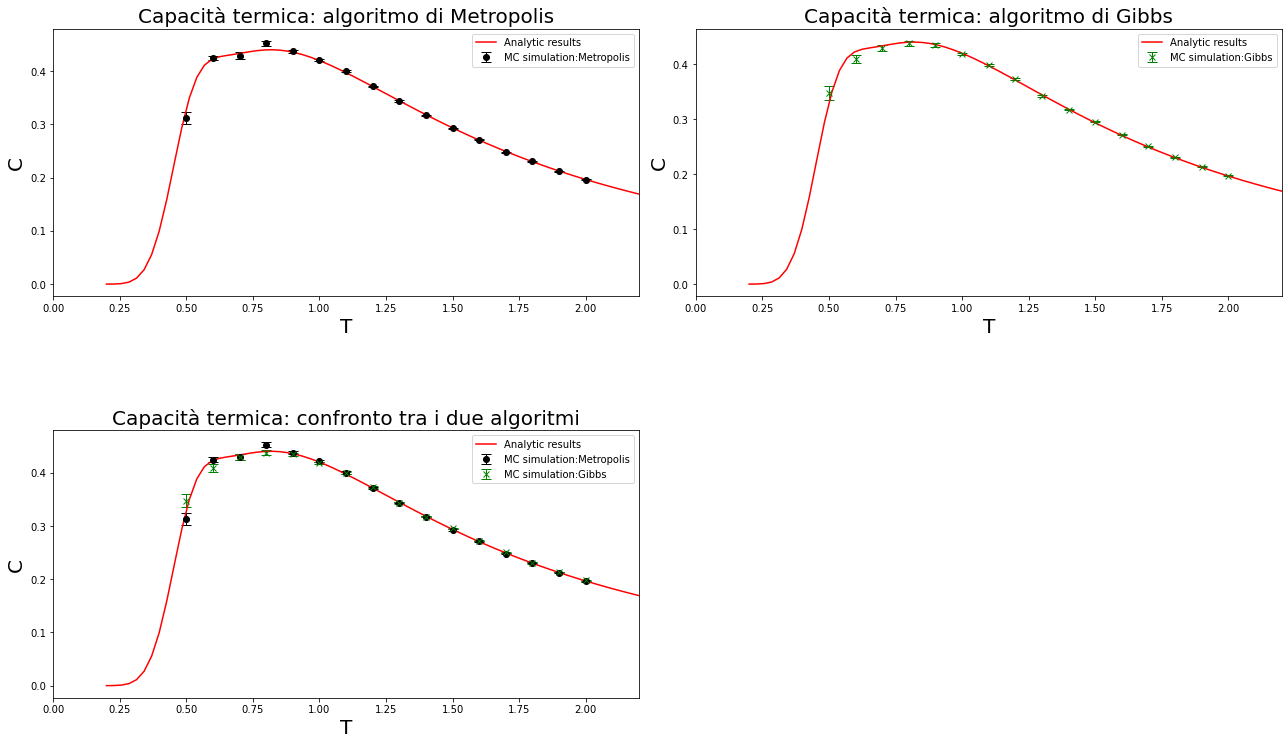

In [10]:
#Confronto della capacità termica valutata con metodi MonteCarlo rispetto al risultato analitico
plt.figure(figsize =(18,10))
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.subplot(2,2,1)
T_sim, heat_sim,std = np.loadtxt("Output/metro_heat.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, heat_sim, yerr=std, label = "MC simulation:Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
plt.plot(T, heat, label = "Analytic results", color = "red")
plt.xlim(0,2.2)
plt.title('Capacità termica: algoritmo di Metropolis',fontsize = 20)
plt.xlabel('T',fontsize = 20)
plt.ylabel('C',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,2)
T_sim, heat_sim,std = np.loadtxt("Output/gibbs_heat.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, heat_sim, yerr=std, label = "MC simulation:Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.plot(T, heat, label = "Analytic results", color = "red")
plt.xlim(0,2.2)
plt.title('Capacità termica: algoritmo di Gibbs',fontsize = 20)
plt.xlabel('T',fontsize = 20)
plt.ylabel('C',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,3)
T_sim, heat_sim,std = np.loadtxt("Output/metro_heat.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, heat_sim, yerr=std, label = "MC simulation:Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
T_sim, heat_sim,std = np.loadtxt("Output/gibbs_heat.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, heat_sim, yerr=std, label = "MC simulation:Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.plot(T, heat, label = "Analytic results", color = "red")
plt.xlim(0,2.2)
plt.title('Capacità termica: confronto tra i due algoritmi',fontsize = 20)
plt.xlabel('T',fontsize = 20)
plt.ylabel('C',fontsize = 20)
plt.legend(loc = "best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

Si può notare come in un range di temperatura compreso tra $T = [0.5,1] K$, corrispondente all'inizio dell'allineamento degli spin del sistema, la capacità termica abbia un massimo locale: in quel range di temperature il sistema riesce difatti a scambiare calore, assorbendo o cedendo energia, in modo più efficiente possibile. Al di sotto di quelle temperature il sistema inizia ad avere configurazioni con spin più ordinati, portando la capacità termica a valore nullo, mentre per temperature maggiori viene rotto l'ordine parziale che si era formato, ed il sistema si sposta verso configurazioni disordinate portando ad un conseguente calo del valore della capacità termica.

#### Magnetizzazione

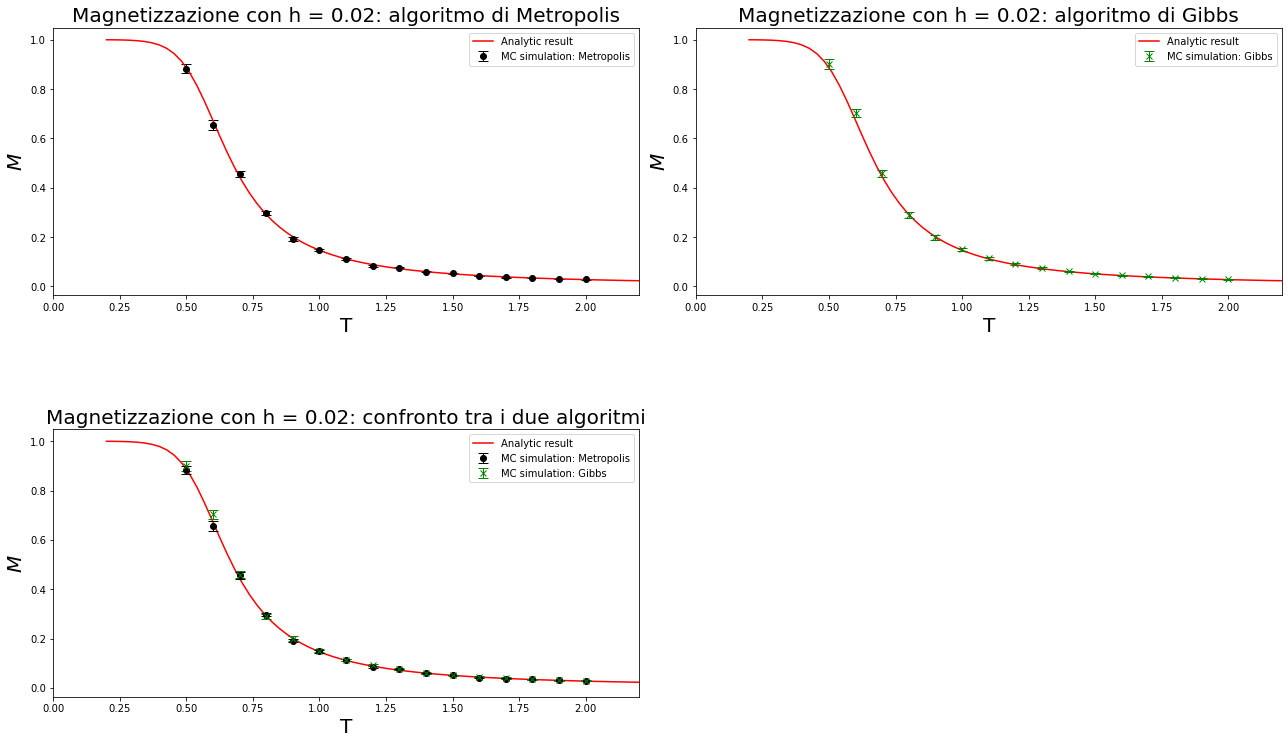

In [11]:
#Confronto della magnetizzazione valutata con metodi MonteCarlo rispetto al risultato analitico
plt.figure(figsize=(18,10))
h=0.02 #external field
points=100
T = np.linspace(0.2,3.0,num=points)
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.subplot(2,2,1)
T_sim, mag_sim,std = np.loadtxt("Output/metro_mag.hT", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, mag_sim, yerr=std, label = "MC simulation: Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
plt.plot(T, M, label = "Analytic result", color = "red")
plt.title('Magnetizzazione con h = 0.02: algoritmo di Metropolis',fontsize = 20)
plt.xlim(0,2.2)
plt.xlabel('T',fontsize = 20)
plt.ylabel('$M$',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,2)
plt.plot(T, M, label = "Analytic result", color = "red")
T_sim, mag_sim,std = np.loadtxt("Output/gibbs_mag.hT", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, mag_sim, yerr=std, label = "MC simulation: Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.title('Magnetizzazione con h = 0.02: algoritmo di Gibbs',fontsize = 20)
plt.xlim(0,2.2)
plt.xlabel('T',fontsize = 20)
plt.ylabel('$M$',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,3)
plt.plot(T, M, label = "Analytic result", color = "red")
T_sim, mag_sim,std = np.loadtxt("Output/metro_mag.hT", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, mag_sim, yerr=std, label = "MC simulation: Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
T_sim, mag_sim,std = np.loadtxt("Output/gibbs_mag.hT", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, mag_sim, yerr=std, label = "MC simulation: Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.title('Magnetizzazione con h = 0.02: confronto tra i due algoritmi',fontsize = 20)
plt.xlim(0,2.2)
plt.xlabel('T',fontsize = 20)
plt.ylabel('$M$',fontsize = 20)
plt.legend(loc = "best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

Poiché per $h = 0$ si ha che la magnetizzazione totale del materiale è nulla, essa viene calcolata utilizzando un campo magnetico esterno $h = 0.02$. All'aumentare della $T$ il valore della magnetizzazione diventa sempre più piccolo, pur restando diverso da zero grazie all'azione del campo magnetico esterno, che fa prediligere comunque una configurazione di spin up rispetto a quella di spin down. Al diminuire della $T$ la magnetizzazione per spin cresce fino a tendere al valore $M(N,T,h) = 1$, che identifica spin tutti allineati tra loro.

#### Suscettività magnetica

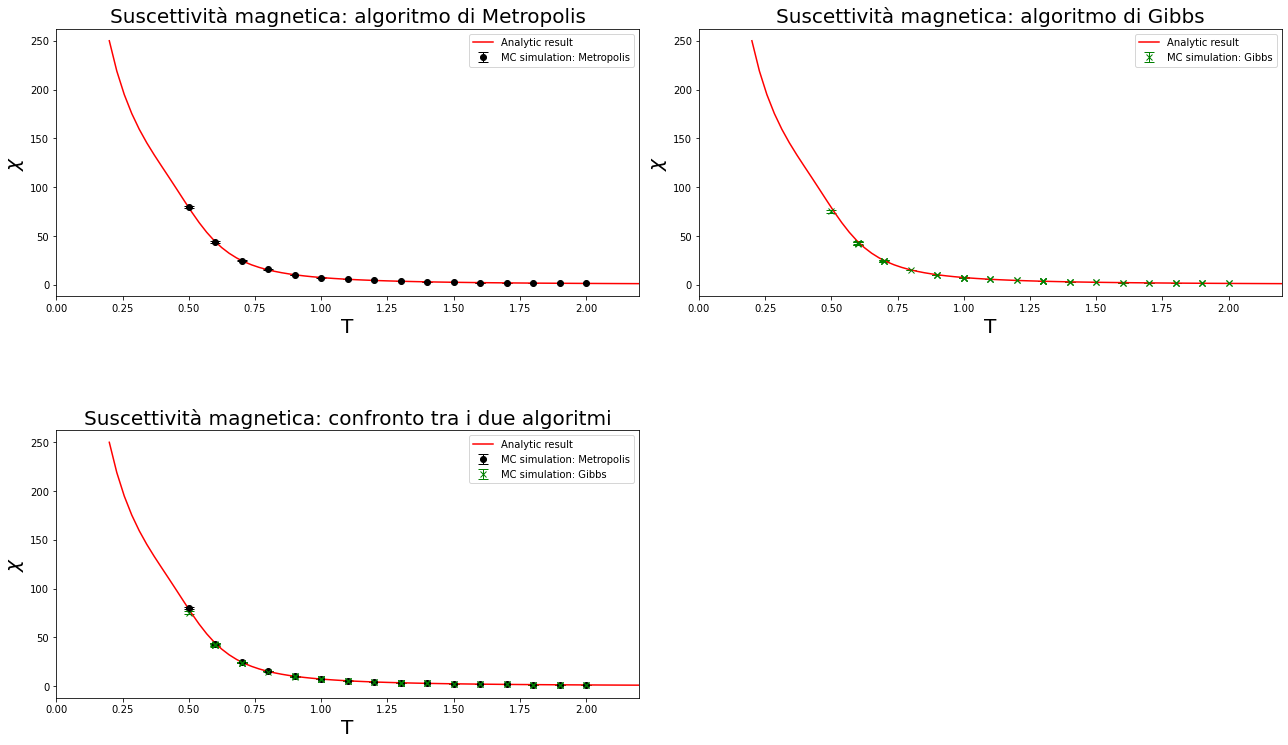

In [12]:
#Confronto della suscettività magnetica valutata con metodi MonteCarlo rispetto al risultato analitico
plt.figure(figsize=(18,10))
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.subplot(2,2,1)
T_sim, chi_sim,std = np.loadtxt("Output/metro_chi.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, chi_sim, yerr=std, label = "MC simulation: Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
plt.plot(T, X, label = "Analytic result", color = "red")
plt.title('Suscettività magnetica: algoritmo di Metropolis',fontsize = 20)
plt.xlim(0,2.2)
plt.xlabel('T',fontsize = 20)
plt.ylabel('$\chi$',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,2)
T_sim, chi_sim,std = np.loadtxt("Output/gibbs_chi.T", usecols = (1,3,4), unpack = True)
plt.errorbar(T_sim, chi_sim, yerr=std, label = "MC simulation: Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.plot(T, X, label = "Analytic result", color = "red")
plt.title('Suscettività magnetica: algoritmo di Gibbs',fontsize = 20)
plt.xlim(0,2.2)
plt.xlabel('T',fontsize = 20)
plt.ylabel('$\chi$',fontsize = 20)
plt.legend(loc = "best")

plt.subplot(2,2,3)
T_sim, chi_sim,std = np.loadtxt("Output/metro_chi.T", usecols = (0,2,3), unpack = True)
plt.errorbar(T_sim, chi_sim, yerr=std, label = "MC simulation: Metropolis", fmt = "ko", capsize = 5, elinewidth = 1)
T_sim, chi_sim,std = np.loadtxt("Output/gibbs_chi.T", usecols = (1,3,4), unpack = True)
plt.errorbar(T_sim, chi_sim, yerr=std, label = "MC simulation: Gibbs", fmt = "gx", capsize = 5, elinewidth = 1)
plt.plot(T, X, label = "Analytic result", color = "red")
plt.title('Suscettività magnetica: confronto tra i due algoritmi',fontsize = 20)
plt.xlim(0,2.2)
plt.xlabel('T',fontsize = 20)
plt.ylabel('$\chi$',fontsize = 20)
plt.legend(loc = "best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

Al diminuire della $T$ vi è un rapido aumento del valore della suscettività magnetica $\chi(N,T)$; a basse temperature dunque aumentando il campo magnetico esterno da un valore nullo ad un valore non nullo piccolo a piacere vi sarà un'immediata risposta del mezzo, il quale assumerà una magnetizzazione $M(N,T,h)\neq 0$ molto rapidamente.

Entrambi gli algoritmi utilizzati simulano in modo adeguato le proprietà termodinamiche del sistema, ottenendo risultati che sono confrontabili con i risultati esatti ricavati nel caso monodimensionale grazie alla conoscenza della funzione di partizione $Z$.